In [1]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras import metrics
import matplotlib.pyplot as plt

In [2]:
train_path = '../chest_xray/train'
test_path = '../chest_xray/test'

train_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    vertical_flip=True,
    horizontal_flip=True,
    rotation_range=90,
    zoom_range=0.5
)

train_ds = train_generator.flow_from_directory(
    train_path,
    subset='training',
    target_size=(256,256),
    class_mode='binary',
    seed=42
)

val_ds = train_generator.flow_from_directory(
    train_path,
    subset='validation',
    target_size=(256,256),
    class_mode='binary',
    seed=42
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='tanh',padding='same',
                        input_shape=(256, 256, 3)))                     
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (1, 1), activation='tanh',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (1, 1), activation='tanh',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='tanh'))
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4
)

checkpoint = keras.callbacks.ModelCheckpoint(
    monitor='val_loss',
    filepath='save_data/04_tanh_activation/',
    save_weights_only=True
)

callbacks = [stop_early,checkpoint]

In [5]:
use_metrics = [metrics.BinaryAccuracy(),\
                metrics.Precision(),\
                metrics.Recall()]

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=[use_metrics]
)

In [6]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

model.load_weights('save_data/04_tanh_activation/')

Epoch 1/20
131/131 [==============================] - 93s 709ms/step - loss: 0.6008 - binary_accuracy: 0.7431 - precision: 0.7430 - recall: 1.0000 - val_loss: 0.5706 - val_binary_accuracy: 0.7430 - val_precision: 0.7430 - val_recall: 1.0000
Epoch 2/20
131/131 [==============================] - 92s 705ms/step - loss: 0.5723 - binary_accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.5711 - val_binary_accuracy: 0.7430 - val_precision: 0.7430 - val_recall: 1.0000
Epoch 3/20
131/131 [==============================] - 92s 702ms/step - loss: 0.5720 - binary_accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.5719 - val_binary_accuracy: 0.7430 - val_precision: 0.7430 - val_recall: 1.0000
Epoch 4/20
131/131 [==============================] - 92s 703ms/step - loss: 0.5716 - binary_accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000 - val_loss: 0.5702 - val_binary_accuracy: 0.7430 - val_precision: 0.7430 - val_recall: 1.0000
Epoch 5/20
131/131 [================

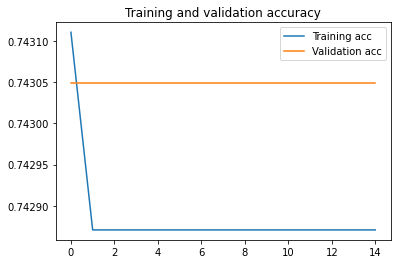

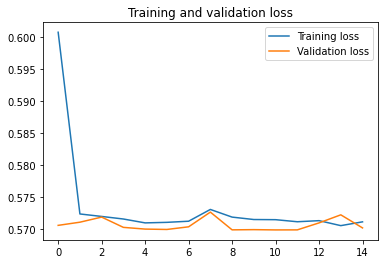

In [7]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [8]:
train_res = model.evaluate(train_ds)

131/131 [==============================] - 53s 406ms/step - loss: 0.5703 - binary_accuracy: 0.7429 - precision: 0.7429 - recall: 1.0000


In [9]:
val_res = model.evaluate(val_ds)

33/33 [==============================] - 13s 387ms/step - loss: 0.5702 - binary_accuracy: 0.7430 - precision: 0.7430 - recall: 1.0000


In [10]:
test_generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_ds = train_generator.flow_from_directory(
    test_path,
    target_size=(256,256),
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


In [11]:
test_res = model.evaluate(test_ds)

20/20 [==============================] - 7s 350ms/step - loss: 0.6888 - binary_accuracy: 0.6250 - precision: 0.6250 - recall: 1.0000


In [12]:
model.save('save_data/04_tanh_activation/')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save_data/04_tanh_activation/assets
